Tutorial 03

Your task is the following:

1. Compute the distance to a galaxy, in suitable units, given the galaxy's serial number.

2. Compute the number of galaxies observed by SDSS-MaNGA, in some given distance interval.

3. Compute the physical separation between two galaxies, given their serial numbers. Note: The two galaxies might be at different radial distances.

--------------------------------------------------------------------------------------------------------------------------------------

Solution to Tutorial 03

Part 1

Compute the distance to a galaxy, in suitable units, given the galaxy's serial number.

In [18]:
import numpy as np
from PIL import Image

In [47]:
galaxies = np.loadtxt("galaxies.csv", delimiter = ",", dtype = float)
#galaxies = serial_number, RA, Dec, redshift = np.loadtxt("galaxies.csv", delimiter = ",", unpack = True) # unpack=True splits each column of the CSV into separate variables.

np.set_printoptions(precision=10, suppress=True, floatmode='maxprec')

print(galaxies)
print(len(galaxies))

[[   1.           133.3711        57.598427       0.039515216]
 [   2.           133.68567       57.48025        0.041055806]
 [   3.           136.01717       57.09233        0.04657103 ]
 ...
 [4654.           228.07332       29.65721        0.06902184 ]
 [4655.           227.04141       29.222193       0.11129715 ]
 [4656.           228.17638       27.799559       0.068651415]]
4656


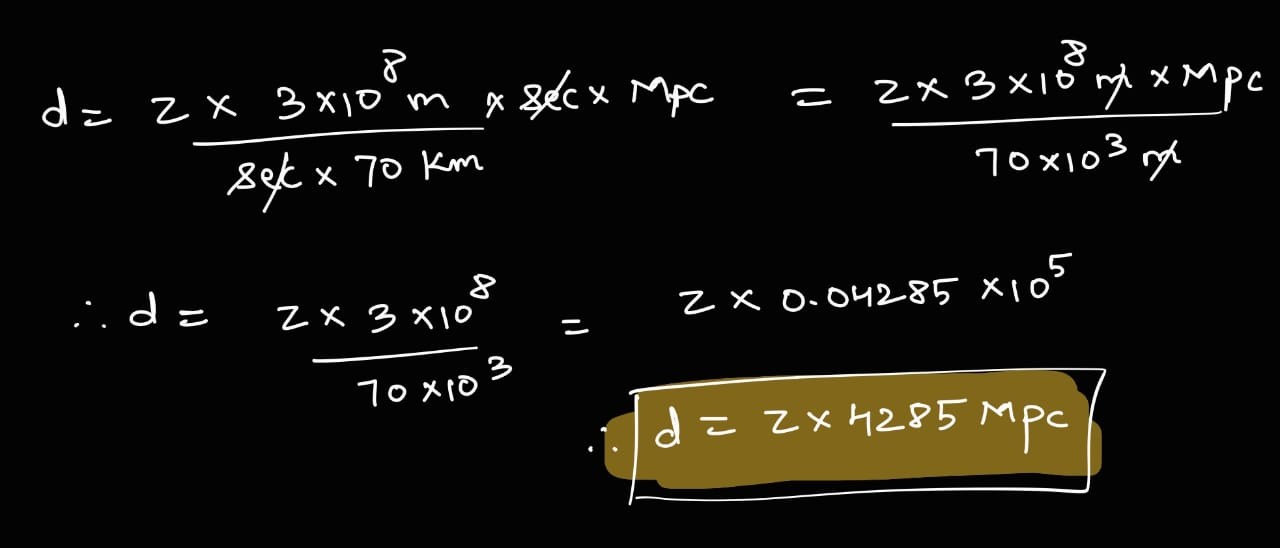

In [48]:
Image.open("Calculation.jpg")

In [46]:
redshift = galaxies[:,3]
print(redshift)
print(len(redshift))

[0.039515216 0.041055806 0.04657103  ... 0.06902184  0.11129715
 0.068651415]
4656


In [87]:
def dist_to_gal(z):
    d = z*4285
    return d
distance = dist_to_gal(redshift)
print(distance)
print(len(distance))

#print(max(distance))
#print(min(distance))

[169.32270056  175.92412871  199.55686355  ... 295.7585844   476.90828775
 294.171313275]
4656


In [78]:
serial_number = galaxies[:,0]

numbers = np.arange(1,4657)
serial_number_updated = {}

#def adjust_index(i, s):
#    serial_number[i] = s
    

for i in numbers:
    for s in serial_number:
        serial_number_updated[i] = s


print(numbers)

[   1    2    3 ... 4654 4655 4656]


In [68]:
print(f"The distance to the galaxy with serial number {serial_number[2]} is {distance[2]:5.2f} Mpc.")
#:5.2f is for string formatting

The distance to the galaxy with serial number 3.0 is 199.56 Mpc.


---------------------------------------------------------------------------------------------------------------------------------------------

Part 2

Compute the number of galaxies observed by SDSS-MaNGA, in some given distance interval.

In [65]:
distance_reshaped = np.expand_dims(distance, axis=1)
galaxies_updated = np.hstack((galaxies, distance_reshaped))
print(galaxies_updated)

[[   1.           133.3711        57.598427       0.039515216
   169.32270056 ]
 [   2.           133.68567       57.48025        0.041055806
   175.92412871 ]
 [   3.           136.01717       57.09233        0.04657103
   199.55686355 ]
 ...
 [4654.           228.07332       29.65721        0.06902184
   295.7585844  ]
 [4655.           227.04141       29.222193       0.11129715
   476.90828775 ]
 [4656.           228.17638       27.799559       0.068651415
   294.171313275]]


In [121]:
galaxies_updated_sorted = np.sort(galaxies_updated[:,4])
print(galaxies_updated_sorted)

[   2.719167587     3.264358421     7.1389706875 ...  642.29514725
  643.5585795    1192.0168974   ]


In [127]:
dist_min_value = min(distance)
print(dist_min_value)
dist_max_value = max(distance)
print(dist_max_value)

print(f"The range of distance of galaxies observed by SDSS-MaNGA is ({dist_min_value}, {dist_max_value}).")


lower_bound = float(input("Enter the lower bound for distance:"))
upper_bound = float(input("Enter the upper bound for distance:"))


count = 0
for d in galaxies_updated_sorted:
    if lower_bound <= d <= upper_bound:
        count += 1

print(f"The number of galaxies within the distance range ({lower_bound}, {upper_bound}) is {count}.")



2.719167587
1192.0168974
The range of distance of galaxies observed by SDSS-MaNGA is (2.719167587, 1192.0168974).
The number of galaxies within the distance range (1.0, 100.0) is 738.


---------------------------------------------------------------------------------------------------------------------------------------------

Part 3

Compute the physical separation between two galaxies, given their serial numbers. Note: The two galaxies might be at different radial distances.

In [154]:
s_1 = int(input("Enter the serial number of the first object (galaxy):"))
s_2 = int(input("Enter the serial number of the second object (galaxy):"))

s1 = s_1 - 1
s2 = s_2 - 1

obj_1 = (galaxies_updated[s1,1], galaxies_updated[s1,2])
print(obj_1)
obj_2 = (galaxies_updated[s2,1], galaxies_updated[s2,2])
print(obj_2)

(204.88484, 27.107147)
(113.057014, 39.560074)


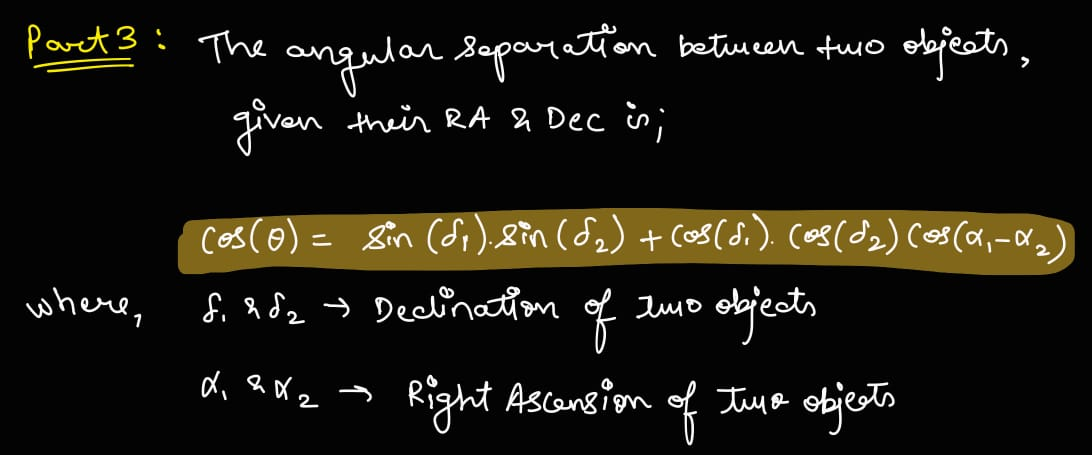

In [151]:
Image.open("Angular_sep_formula.jpg")

In [155]:
def angular_separation(galaxies_updated):
    theta = np.arccos((np.sin(obj_1[1])*np.sin(obj_2[1]) + np.cos(obj_1[1])*np.cos(obj_2[1])*np.cos(obj_1[0] - obj_2[0])))
    return theta
    
ang_sep = angular_separation(galaxies_updated)
print(f"The angular separation between the galaxies with serial numbers {s_1} and {s_2} is {ang_sep}.")

The angular separation between the galaxies with serial numbers 50 and 500 is 0.6487363338998126.
